In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import project_root

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

In [2]:
root = project_root()

In [3]:
df = pd.read_csv(root + "data//csv//premierleague_data.csv", parse_dates=['timestamp'])

In [4]:
df = df[df['gw'] > 3]

In [5]:
df.head()

,timestamp,hometeam,awayteam,fthg,ftag,ftr,hs,as,hst,ast,...,ashots,hshotstarget,ashotstarget,hfouls,afouls,hcorners,acorners,gnum,hgw,agw
30,2000-09-05,Man United,Bradford,6,0,H,21,6,12,4,...,23,20,9,23,33,18,13,31,4,4
31,2000-09-05,Sunderland,West Ham,1,1,D,17,16,7,9,...,46,9,25,36,42,11,25,32,4,4
32,2000-09-05,Tottenham,Everton,3,2,H,11,11,7,6,...,37,12,23,42,48,10,18,33,4,4
33,2000-09-06,Charlton,Southampton,1,1,D,8,11,6,3,...,39,18,17,28,38,9,21,34,4,4
34,2000-09-06,Chelsea,Arsenal,2,2,D,12,13,5,5,...,32,23,16,47,33,21,17,35,4,4


In [6]:
# add in a column that we will try and predict
df['totalgoals'] = df['fthg'] + df['ftag']

In [7]:
columns_to_drop = [
    'timestamp',
    'hometeam',
    'awayteam',
    'ftr',
    'fthg',
    'ftag',
    'hs',
    'as',
    'hst',
    'ast',
    'af',
    'hf',
    'hc',
    'ac',
    'gnum',
    'gw',
    'season'
]

In [8]:
for name in columns_to_drop:
    df.drop(name, inplace = True, axis = 1)

In [9]:
df.columns

Index(['hpos', 'apos', 'hpoints', 'apoints', 'hgoalscored', 'agoalscored',
       'hgoalconceded', 'agoalconceded', 'hshots', 'ashots', 'hshotstarget',
       'ashotstarget', 'hfouls', 'afouls', 'hcorners', 'acorners', 'hgw',
       'agw', 'totalgoals'],
      dtype='object')

In [10]:
X = df.copy()
y = X.pop('totalgoals').values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [13]:
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

In [31]:
rf = RandomForestRegressor(n_estimators=100, criterion = 'mae')

In [32]:
rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [24]:
y_pred = rf.predict(X_test)

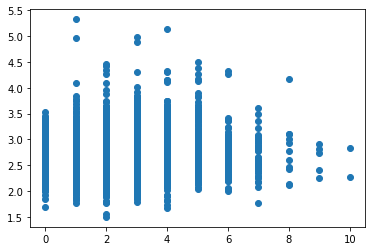

In [25]:
plt.scatter(y_test, y_pred)

(array([185., 404., 580., 504., 333., 182.,  64.,  40.,  11.,   7.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

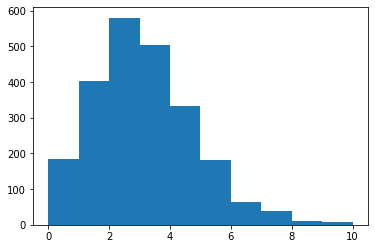

In [27]:
plt.hist(y_test)

(array([ 22., 228., 743., 864., 325.,  92.,  19.,  12.,   1.,   4.]),
 array([1.5  , 1.883, 2.266, 2.649, 3.032, 3.415, 3.798, 4.181, 4.564,
        4.947, 5.33 ]),
 <BarContainer object of 10 artists>)

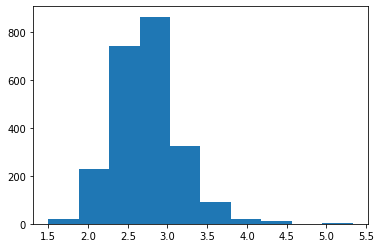

In [28]:
plt.hist(y_pred)